![image](https://github.com/ecastillot/SeisMonitor/blob/master/docs/figures/seismonitor.PNG?raw=true)

**This code is necessary on colab to install SeisMonitor.** 

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install SeisMonitor
    !pip install git+https://github.com/ecastillot/EQTransformer.git@master
    !pip install git+https://github.com/wayneweiqiang/GaMMA.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 2.9 MB/s eta 0:00:00
  Cloning https://github.com/wayneweiqiang/GaMMA.git to /tmp/pip-req-build-01ofoygs
  Running command git clone --filter=blob:none --quiet https://github.com/wayneweiqiang/GaMMA.git /tmp/pip-req-build-01ofoygs
  Resolved https://github.com/wayneweiqiang/GaMMA.git to commit 831eb619b4f15a66744a1cf6024c4076130749e5
  Preparing metadata (setup.py) ... done


**Please restart the kernel. It's mandatory to get everything up and running.**

Firstable, as we are using colab, we have to download the picks data for this example.

In [1]:
import os
from SeisMonitor.utils4examples import clone_seismonitor_data

others = "../others"
clone_seismonitor_data(others,branch="others")
picks = os.path.join(others,"picks")
stations = os.path.join(others,"stations")


print("others dir: ",others)
print("Important folders in others directory",os.listdir(others))

We will use seismic phases picked by PhaseNet and EQTransformer using the SeisMonitor format. Take a look in [2.picker.ipynb](https://colab.research.google.com/github/ecastillot/SeisMonitor/blob/master/examples/2.picker.ipynb). 

We will associate those seismic phases using GaMMA.

# Association with GaMMA

In [ ]:
import os
from SeisMonitor.monitor.associator.ai import GaMMA,GaMMAObj
from SeisMonitor.monitor.associator import utils as asut

We create the object: GaMMAObj, which contains the GaMMA parameters.

In [ ]:
region = [-76.729, -72.315,1.55, 5.314,0, 150]
gc = GaMMAObj(region,"EPSG:3116",
                use_amplitude = False,
                use_dbscan=False,
                calculate_amp=False)

- GaMMA is instanced with GaMMAObj.
- We use **asociate** method to asociate seismic phases. The input parameters are:
    - Picks filepath using seismonitor format.
    - Inventory filepath of the seismic network.
    - Output folder for GaMMA

## Associations for EQTransformer picks

In [6]:
inv = os.path.join(stations,"inv.xml")
picks = os.path.join(picks,"eqt_seismonitor_picks.csv")
out_dir = os.path.join("gamma_asso")

g = GaMMA(gc)
obspy_catalog, df_catalog,df_picks = g.associate(picks,inv,out_dir)
print(obspy_catalog)

0it [00:00, ?it/s]

28 Event(s) in Catalog:
2019-12-24T19:56:35.090000Z |  +3.323,  -74.031 | automatic
2019-12-24T19:10:10.891000Z |  +5.065,  -74.872 | automatic
...
2019-12-24T22:46:28.965000Z |  +3.235,  -74.183 | automatic
2019-12-24T22:47:36.422000Z |  +3.065,  -73.997 | automatic
To see all events call 'print(CatalogObject.__str__(print_all=True))'


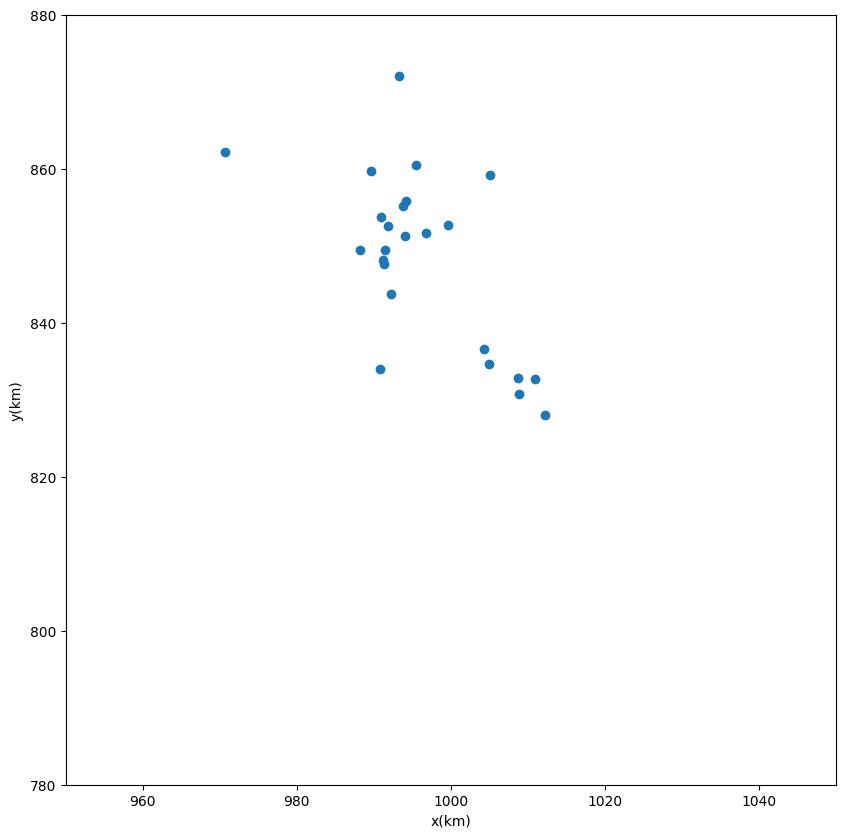

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.scatter(df_catalog["x(km)"], df_catalog["y(km)"])
ax.set_xlabel("x(km)")
ax.set_ylabel("y(km)")
ax.set_xlim(950,1050)
ax.set_ylim(780,880)
plt.show()

## Associations with PhaseNet

In [8]:
data = os.path.join(repository_path,"data")

inv = os.path.join(data,"stations","inv.xml")
picks = os.path.join(data,"picks","pnet_seismonitor_picks.csv")
out_dir = os.path.join(repository_path,"out","asso","pnet")

g = GaMMA(gc)
obspy_catalog, df_catalog,df_picks = g.associate(picks,inv,out_dir)
print(obspy_catalog)

18 Event(s) in Catalog:
2019-12-24T19:15:41.858000Z |  +3.111,  -74.031 | automatic
2019-12-24T19:48:09.563000Z |  +3.211,  -74.146 | automatic
...
2019-12-24T23:15:04.807000Z |  +3.002,  -73.976 | automatic
2019-12-24T23:32:42.582000Z |  +3.076,  -74.040 | automatic
To see all events call 'print(CatalogObject.__str__(print_all=True))'


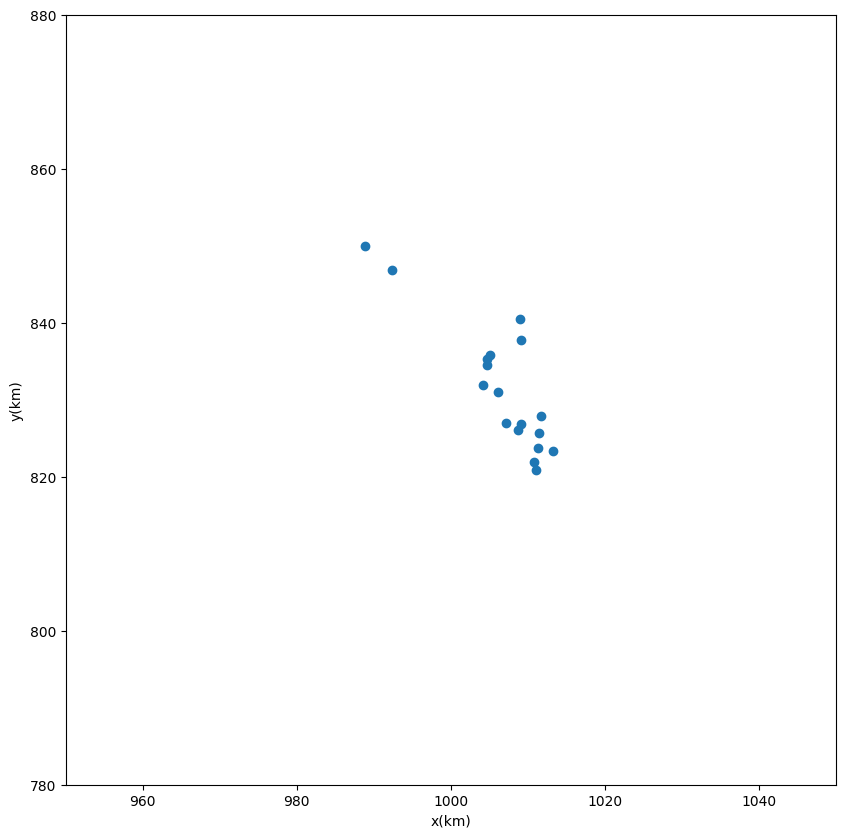

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.scatter(df_catalog["x(km)"], df_catalog["y(km)"])
ax.set_xlabel("x(km)")
ax.set_ylabel("y(km)")
ax.set_xlim(950,1050)
ax.set_ylim(780,880)
plt.show()